A/B test results

In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv(r"D:\GoIT\ab_test_data.csv") 

# Convert 'timestamp' column to datetime format
df['timestamp'] = pd.to_datetime(df['timestamp'])

# 1. Number of users in groups A and B
user_counts = df['test_group'].value_counts()

# 2. Number of conversions in groups A and B
conversion_counts = df.groupby('test_group')['conversion'].sum()

# 3. Conversion rate in groups A and B
conversion_rates = df.groupby('test_group')['conversion'].mean()

# 4. Start date, end date, and test duration
start_date = df['timestamp'].min()
end_date = df['timestamp'].max()
duration_days = (end_date - start_date).days

# Display the results
print(f"Number of users:")
print(user_counts, "\n")

print(f"Number of conversions:")
print(conversion_counts, "\n")

print(f"Conversion rates:")
print((conversion_rates * 100).round(2).astype(str) + "%", "\n")

print(f"Test period:")
print(f"Start date: {start_date.date()}")
print(f"End date: {end_date.date()}")
print(f"Duration: {duration_days} days")


Number of users:
test_group
a    10013
b     9985
Name: count, dtype: int64 

Number of conversions:
test_group
a    611
b    889
Name: conversion, dtype: int64 

Conversion rates:
test_group
a    6.1%
b    8.9%
Name: conversion, dtype: object 

Test period:
Start date: 2023-07-03
End date: 2023-07-25
Duration: 21 days


Hypothesis testing using Student's t-test

In [5]:
from scipy import stats

alpha = 0.05

statistic, pvalue = stats.ttest_ind(df[df['test_group'] == 'a']['conversion'],
                                    df[df['test_group'] == 'b']['conversion'], 
                                    alternative='less')

print(f't-statistic: {round(statistic, 2)}, p-value: {round(pvalue, 2)}')

if pvalue < alpha:
    print('The difference is statistically significant, Null Hypothesis is rejected.')
else:
    print('The difference is insignificant, Null Hypothesis cannot rejected.')


t-statistic: -7.53, p-value: 0.0
The difference is statistically significant, Null Hypothesis is rejected.


Comparison of mean values ​​in groups with 95% confidence intervals

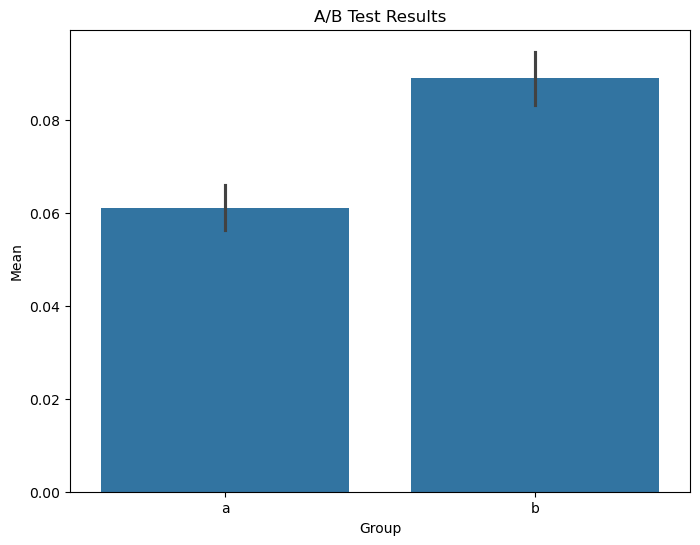

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.barplot(x=df['test_group'],
            y=df['conversion'],
            errorbar=('ci', 95)) # Confidence Intervals
#mean conversion for two groups

plt.title('A/B Test Results')
plt.xlabel('Group')
plt.ylabel('Mean')

plt.show()

Time Series

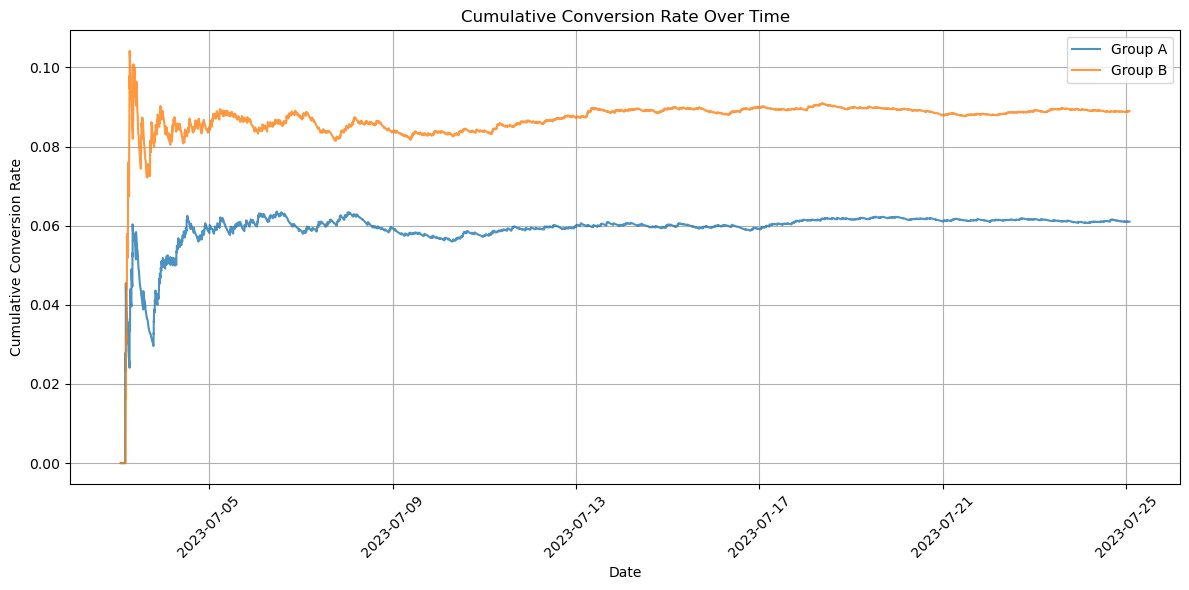

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv(r"D:\GoIT\ab_test_data.csv")
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Sort by timestamp to preserve temporal order
df = df.sort_values(by='timestamp').reset_index(drop=True)

# Separate into A and B groups
group_a = df[df['test_group'] == 'a'].reset_index(drop=True)
group_b = df[df['test_group'] == 'b'].reset_index(drop=True)

# Calculate cumulative conversion rate
cumulative_metric_a = group_a['conversion'].expanding().mean()
cumulative_metric_b = group_b['conversion'].expanding().mean()

# Plot the cumulative conversion rate over time
plt.figure(figsize=(12, 6))
plt.plot(group_a['timestamp'], cumulative_metric_a, label='Group A', alpha=0.8)
plt.plot(group_b['timestamp'], cumulative_metric_b, label='Group B', alpha=0.8)

plt.title('Cumulative Conversion Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Cumulative Conversion Rate')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()
